In [59]:
import pandas as pd
pd.read_csv('wine.csv',header=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [60]:
## 환경 설정 ##
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
import os ## 시스템 만들기 위함
import tensorflow as tf

## 난수 고정 ##
np.random.seed(3)
tf.random.set_seed(3)

## 데이터 확인 ##
df_pre = pd.read_csv('wine.csv',header=None)
df = df_pre.sample(frac=0.15) ## 데이터 샘플 만들기 (15%를 랜덤하게 추출)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.00,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.90,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.40,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.80,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.50,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,8.2,0.570,0.26,2.20,0.060,28.0,65.0,0.99590,3.30,0.43,10.10,5,1
2584,6.0,0.410,0.21,1.90,0.050,29.0,122.0,0.99280,3.42,0.52,10.50,6,0
4446,5.8,0.200,0.34,1.00,0.035,40.0,86.0,0.98993,3.50,0.42,11.70,5,0
3471,5.8,0.330,0.20,16.05,0.047,26.0,166.0,0.99760,3.09,0.46,8.90,5,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 6245 to 2308
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       975 non-null    float64
 1   1       975 non-null    float64
 2   2       975 non-null    float64
 3   3       975 non-null    float64
 4   4       975 non-null    float64
 5   5       975 non-null    float64
 6   6       975 non-null    float64
 7   7       975 non-null    float64
 8   8       975 non-null    float64
 9   9       975 non-null    float64
 10  10      975 non-null    float64
 11  11      975 non-null    int64  
 12  12      975 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 106.6 KB


In [62]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,7.199282,0.343979,0.315826,5.333128,0.058434,29.940513,113.162051,0.994687,3.219303,0.532615,10.473316,5.800000,0.264615
std,1.225679,0.161031,0.144833,4.811715,0.040195,17.127078,55.815845,0.003052,0.159532,0.156318,1.234354,0.876337,0.441355
min,4.700000,0.080000,0.000000,0.700000,0.009000,3.000000,6.000000,0.987220,2.790000,0.230000,8.400000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,73.500000,0.992245,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.800000,0.047000,28.000000,115.000000,0.995000,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.410000,0.390000,7.700000,0.068500,41.000000,153.000000,0.997000,3.320000,0.600000,11.300000,6.000000,1.000000
max,14.300000,1.090000,0.990000,31.600000,0.415000,128.000000,289.000000,1.010300,3.780000,1.980000,14.000000,9.000000,1.000000


In [63]:
df.values

array([[ 5.9  ,  0.18 ,  0.28 , ..., 10.65 ,  7.   ,  0.   ],
       [10.2  ,  0.67 ,  0.39 , ..., 10.   ,  5.   ,  1.   ],
       [ 8.4  ,  0.715,  0.2  , ...,  9.4  ,  5.   ,  1.   ],
       ...,
       [ 5.8  ,  0.2  ,  0.34 , ..., 11.7  ,  5.   ,  0.   ],
       [ 5.8  ,  0.33 ,  0.2  , ...,  8.9  ,  5.   ,  0.   ],
       [ 6.2  ,  0.47 ,  0.21 , ...,  9.2  ,  5.   ,  0.   ]])

In [64]:
## 독립, 종속변수 데이터 지정 ##
X = df.values[:,0:12]
Y = df.values[:,12]
## input_dim 12개

In [65]:
## 모델 구조 생성 ##
model = Sequential()
model.add(Dense(30, input_dim=12, activation = 'relu')) #30층 레이어 추가
model.add(Dense(12, activation = 'relu')) #12층 레이어 추가
model.add(Dense(8, activation = 'relu')) #8층 레이어 추가
model.add(Dense(1, activation = 'sigmoid'))#1층 레이어 추가

In [66]:
## 모델 컴파일 및 학습 ##
model.compile(loss='binary_crossentropy', #손실함수
              optimizer = 'adam', #최적화방식
              metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint, EarlyStopping
# 모델 저장 폴더 지정 (없으면 폴더 만들도록)
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 방법
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath= modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
                               ## 함수안에서 다시 함수를 호출하는 콜백함수
                               ## loss 값이 최소가 되는 지점을 기억해놓기위함
# 학습 조기 종료 시키기
## 적정한 횟수에서 멈추게 하는 EarlyStopping 함수
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X,Y, validation_split=0.33, ## train_test_split 대신 함
                    epochs=1500, batch_size=500,
                    callbacks=[checkpointer,early_stopping_callback])
                    ## fit 함수안에 콜백기능 추가
model.summary()

Epoch 1/1500
2/2 [==============================] - 0s 134ms/step - loss: 2.0445 - accuracy: 0.7266 - val_loss: 1.3696 - val_accuracy: 0.7547

Epoch 00001: val_loss improved from inf to 1.36965, saving model to ./model\01-1.3696.hdf5
Epoch 2/1500
2/2 [==============================] - 0s 27ms/step - loss: 1.6065 - accuracy: 0.7193 - val_loss: 0.9768 - val_accuracy: 0.7547

Epoch 00002: val_loss improved from 1.36965 to 0.97676, saving model to ./model\02-0.9768.hdf5
Epoch 3/1500
2/2 [==============================] - 0s 27ms/step - loss: 1.1012 - accuracy: 0.7286 - val_loss: 0.6556 - val_accuracy: 0.7547

Epoch 00003: val_loss improved from 0.97676 to 0.65557, saving model to ./model\03-0.6556.hdf5
Epoch 4/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.7096 - accuracy: 0.7269 - val_loss: 0.7205 - val_accuracy: 0.6429

Epoch 00004: val_loss did not improve from 0.65557
Epoch 5/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.7508 - accuracy: 0.5977 


Epoch 00073: val_loss did not improve from 0.21449
Epoch 74/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.2449 - accuracy: 0.9250 - val_loss: 0.2152 - val_accuracy: 0.9099

Epoch 00074: val_loss did not improve from 0.21449
Epoch 75/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.2422 - accuracy: 0.9219 - val_loss: 0.2144 - val_accuracy: 0.9099

Epoch 00075: val_loss improved from 0.21449 to 0.21438, saving model to ./model\75-0.2144.hdf5
Epoch 76/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.2555 - accuracy: 0.9179 - val_loss: 0.2146 - val_accuracy: 0.9099

Epoch 00076: val_loss did not improve from 0.21438
Epoch 77/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.2382 - accuracy: 0.9239 - val_loss: 0.2146 - val_accuracy: 0.9099

Epoch 00077: val_loss did not improve from 0.21438
Epoch 78/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.2438 - accuracy: 0.9243 - val_loss: 0.2155 - val_acc

2/2 [==============================] - 0s 25ms/step - loss: 0.2069 - accuracy: 0.9283 - val_loss: 0.1991 - val_accuracy: 0.9193

Epoch 00152: val_loss did not improve from 0.19189
Epoch 153/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.2041 - accuracy: 0.9287 - val_loss: 0.1977 - val_accuracy: 0.9193

Epoch 00153: val_loss did not improve from 0.19189
Epoch 154/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.2035 - accuracy: 0.9263 - val_loss: 0.1983 - val_accuracy: 0.9193

Epoch 00154: val_loss did not improve from 0.19189
Epoch 155/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.2157 - accuracy: 0.9223 - val_loss: 0.1978 - val_accuracy: 0.9193

Epoch 00155: val_loss did not improve from 0.19189
Epoch 156/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.2089 - accuracy: 0.9273 - val_loss: 0.1919 - val_accuracy: 0.9255

Epoch 00156: val_loss improved from 0.19189 to 0.19185, saving model to ./model\156-0.1919.

2/2 [==============================] - 0s 24ms/step - loss: 0.1911 - accuracy: 0.9290 - val_loss: 0.1937 - val_accuracy: 0.9348

Epoch 00192: val_loss did not improve from 0.17913
Epoch 193/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1915 - accuracy: 0.9378 - val_loss: 0.1895 - val_accuracy: 0.9379

Epoch 00193: val_loss did not improve from 0.17913
Epoch 194/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1911 - accuracy: 0.9351 - val_loss: 0.1818 - val_accuracy: 0.9286

Epoch 00194: val_loss did not improve from 0.17913
Epoch 195/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1900 - accuracy: 0.9331 - val_loss: 0.1778 - val_accuracy: 0.9317

Epoch 00195: val_loss improved from 0.17913 to 0.17778, saving model to ./model\195-0.1778.hdf5
Epoch 196/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1847 - accuracy: 0.9331 - val_loss: 0.1769 - val_accuracy: 0.9317

Epoch 00196: val_loss improved from 0.17778 to


Epoch 00231: val_loss did not improve from 0.16495
Epoch 232/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1728 - accuracy: 0.9463 - val_loss: 0.1629 - val_accuracy: 0.9472

Epoch 00232: val_loss improved from 0.16495 to 0.16291, saving model to ./model\232-0.1629.hdf5
Epoch 233/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1745 - accuracy: 0.9415 - val_loss: 0.1620 - val_accuracy: 0.9441

Epoch 00233: val_loss improved from 0.16291 to 0.16203, saving model to ./model\233-0.1620.hdf5
Epoch 234/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1696 - accuracy: 0.9398 - val_loss: 0.1647 - val_accuracy: 0.9472

Epoch 00234: val_loss did not improve from 0.16203
Epoch 235/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1767 - accuracy: 0.9439 - val_loss: 0.1732 - val_accuracy: 0.9503

Epoch 00235: val_loss did not improve from 0.16203
Epoch 236/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1


Epoch 00310: val_loss improved from 0.13908 to 0.13674, saving model to ./model\310-0.1367.hdf5
Epoch 311/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1439 - accuracy: 0.9517 - val_loss: 0.1364 - val_accuracy: 0.9503

Epoch 00311: val_loss improved from 0.13674 to 0.13640, saving model to ./model\311-0.1364.hdf5
Epoch 312/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1419 - accuracy: 0.9507 - val_loss: 0.1436 - val_accuracy: 0.9565

Epoch 00312: val_loss did not improve from 0.13640
Epoch 313/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1459 - accuracy: 0.9598 - val_loss: 0.1532 - val_accuracy: 0.9565

Epoch 00313: val_loss did not improve from 0.13640
Epoch 314/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1428 - accuracy: 0.9645 - val_loss: 0.1382 - val_accuracy: 0.9596

Epoch 00314: val_loss did not improve from 0.13640
Epoch 315/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1

2/2 [==============================] - 0s 28ms/step - loss: 0.1256 - accuracy: 0.9577 - val_loss: 0.1262 - val_accuracy: 0.9627

Epoch 00350: val_loss improved from 0.12641 to 0.12618, saving model to ./model\350-0.1262.hdf5
Epoch 351/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1214 - accuracy: 0.9554 - val_loss: 0.1385 - val_accuracy: 0.9596

Epoch 00351: val_loss did not improve from 0.12618
Epoch 352/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1370 - accuracy: 0.9652 - val_loss: 0.1461 - val_accuracy: 0.9565

Epoch 00352: val_loss did not improve from 0.12618
Epoch 353/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1388 - accuracy: 0.9706 - val_loss: 0.1269 - val_accuracy: 0.9627

Epoch 00353: val_loss did not improve from 0.12618
Epoch 354/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1305 - accuracy: 0.9524 - val_loss: 0.1260 - val_accuracy: 0.9534

Epoch 00354: val_loss improved from 0.12618 to

2/2 [==============================] - 0s 26ms/step - loss: 0.1148 - accuracy: 0.9625 - val_loss: 0.1232 - val_accuracy: 0.9627

Epoch 00390: val_loss did not improve from 0.12108
Epoch 391/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1200 - accuracy: 0.9659 - val_loss: 0.1242 - val_accuracy: 0.9627

Epoch 00391: val_loss did not improve from 0.12108
Epoch 392/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1111 - accuracy: 0.9682 - val_loss: 0.1217 - val_accuracy: 0.9627

Epoch 00392: val_loss did not improve from 0.12108
Epoch 393/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1130 - accuracy: 0.9679 - val_loss: 0.1224 - val_accuracy: 0.9627

Epoch 00393: val_loss did not improve from 0.12108
Epoch 394/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.1144 - accuracy: 0.9662 - val_loss: 0.1241 - val_accuracy: 0.9627

Epoch 00394: val_loss did not improve from 0.12108
Epoch 395/1500
2/2 [====================

2/2 [==============================] - 0s 27ms/step - loss: 0.1065 - accuracy: 0.9703 - val_loss: 0.1158 - val_accuracy: 0.9627

Epoch 00470: val_loss did not improve from 0.11064
Epoch 471/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1002 - accuracy: 0.9716 - val_loss: 0.1138 - val_accuracy: 0.9627

Epoch 00471: val_loss did not improve from 0.11064
Epoch 472/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0997 - accuracy: 0.9736 - val_loss: 0.1110 - val_accuracy: 0.9627

Epoch 00472: val_loss did not improve from 0.11064
Epoch 473/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1024 - accuracy: 0.9686 - val_loss: 0.1105 - val_accuracy: 0.9627

Epoch 00473: val_loss improved from 0.11064 to 0.11047, saving model to ./model\473-0.1105.hdf5
Epoch 474/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.1041 - accuracy: 0.9669 - val_loss: 0.1121 - val_accuracy: 0.9627

Epoch 00474: val_loss did not improve from 0.1

2/2 [==============================] - 0s 26ms/step - loss: 0.0976 - accuracy: 0.9699 - val_loss: 0.1066 - val_accuracy: 0.9627

Epoch 00510: val_loss did not improve from 0.10642
Epoch 511/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0958 - accuracy: 0.9730 - val_loss: 0.1071 - val_accuracy: 0.9627

Epoch 00511: val_loss did not improve from 0.10642
Epoch 512/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0983 - accuracy: 0.9706 - val_loss: 0.1081 - val_accuracy: 0.9627

Epoch 00512: val_loss did not improve from 0.10642
Epoch 513/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0925 - accuracy: 0.9726 - val_loss: 0.1095 - val_accuracy: 0.9658

Epoch 00513: val_loss did not improve from 0.10642
Epoch 514/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0927 - accuracy: 0.9730 - val_loss: 0.1118 - val_accuracy: 0.9658

Epoch 00514: val_loss did not improve from 0.10642
Epoch 515/1500
2/2 [====================

2/2 [==============================] - 0s 26ms/step - loss: 0.0926 - accuracy: 0.9737 - val_loss: 0.1000 - val_accuracy: 0.9658

Epoch 00591: val_loss did not improve from 0.09978
Epoch 592/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0827 - accuracy: 0.9753 - val_loss: 0.1017 - val_accuracy: 0.9689

Epoch 00592: val_loss did not improve from 0.09978
Epoch 593/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0945 - accuracy: 0.9642 - val_loss: 0.0999 - val_accuracy: 0.9658

Epoch 00593: val_loss did not improve from 0.09978
Epoch 594/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0822 - accuracy: 0.9736 - val_loss: 0.1091 - val_accuracy: 0.9658

Epoch 00594: val_loss did not improve from 0.09978
Epoch 595/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0853 - accuracy: 0.9757 - val_loss: 0.1099 - val_accuracy: 0.9658

Epoch 00595: val_loss did not improve from 0.09978
Epoch 596/1500
2/2 [====================


Epoch 00631: val_loss did not improve from 0.09766
Epoch 632/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0821 - accuracy: 0.9720 - val_loss: 0.0985 - val_accuracy: 0.9658

Epoch 00632: val_loss did not improve from 0.09766
Epoch 633/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0754 - accuracy: 0.9797 - val_loss: 0.0967 - val_accuracy: 0.9658

Epoch 00633: val_loss improved from 0.09766 to 0.09669, saving model to ./model\633-0.0967.hdf5
Epoch 634/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0777 - accuracy: 0.9750 - val_loss: 0.0996 - val_accuracy: 0.9658

Epoch 00634: val_loss did not improve from 0.09669
Epoch 635/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0726 - accuracy: 0.9787 - val_loss: 0.1070 - val_accuracy: 0.9627

Epoch 00635: val_loss did not improve from 0.09669
Epoch 636/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0807 - accuracy: 0.9723 - val_loss: 0.1031 - v


Epoch 00672: val_loss did not improve from 0.09505
Epoch 673/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0735 - accuracy: 0.9784 - val_loss: 0.0953 - val_accuracy: 0.9627

Epoch 00673: val_loss did not improve from 0.09505
Epoch 674/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0722 - accuracy: 0.9780 - val_loss: 0.0968 - val_accuracy: 0.9658

Epoch 00674: val_loss did not improve from 0.09505
Epoch 675/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0714 - accuracy: 0.9780 - val_loss: 0.0960 - val_accuracy: 0.9658

Epoch 00675: val_loss did not improve from 0.09505
Epoch 676/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0694 - accuracy: 0.9797 - val_loss: 0.0973 - val_accuracy: 0.9658

Epoch 00676: val_loss did not improve from 0.09505
Epoch 677/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0719 - accuracy: 0.9780 - val_loss: 0.0995 - val_accuracy: 0.9658

Epoch 00677: val_loss di

2/2 [==============================] - 0s 27ms/step - loss: 0.0684 - accuracy: 0.9757 - val_loss: 0.0966 - val_accuracy: 0.9689

Epoch 00714: val_loss did not improve from 0.09250
Epoch 715/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0690 - accuracy: 0.9760 - val_loss: 0.0938 - val_accuracy: 0.9689

Epoch 00715: val_loss did not improve from 0.09250
Epoch 716/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0685 - accuracy: 0.9777 - val_loss: 0.0944 - val_accuracy: 0.9689

Epoch 00716: val_loss did not improve from 0.09250
Epoch 717/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0681 - accuracy: 0.9767 - val_loss: 0.0964 - val_accuracy: 0.9689

Epoch 00717: val_loss did not improve from 0.09250
Epoch 718/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0696 - accuracy: 0.9750 - val_loss: 0.0957 - val_accuracy: 0.9689

Epoch 00718: val_loss did not improve from 0.09250
Epoch 719/1500
2/2 [====================


Epoch 00755: val_loss improved from 0.09158 to 0.09152, saving model to ./model\755-0.0915.hdf5
Epoch 756/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0662 - accuracy: 0.9790 - val_loss: 0.0927 - val_accuracy: 0.9689

Epoch 00756: val_loss did not improve from 0.09152
Epoch 757/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0651 - accuracy: 0.9801 - val_loss: 0.0974 - val_accuracy: 0.9720

Epoch 00757: val_loss did not improve from 0.09152
Epoch 758/1500
2/2 [==============================] - 0s 25ms/step - loss: 0.0652 - accuracy: 0.9774 - val_loss: 0.0932 - val_accuracy: 0.9720

Epoch 00758: val_loss did not improve from 0.09152
Epoch 759/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0625 - accuracy: 0.9774 - val_loss: 0.0916 - val_accuracy: 0.9720

Epoch 00759: val_loss did not improve from 0.09152
Epoch 760/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0625 - accuracy: 0.9780 - val_loss: 0.0919 - v

2/2 [==============================] - 0s 29ms/step - loss: 0.0600 - accuracy: 0.9784 - val_loss: 0.0911 - val_accuracy: 0.9720

Epoch 00797: val_loss did not improve from 0.09082
Epoch 798/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0629 - accuracy: 0.9787 - val_loss: 0.0909 - val_accuracy: 0.9689

Epoch 00798: val_loss did not improve from 0.09082
Epoch 799/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0594 - accuracy: 0.9814 - val_loss: 0.0912 - val_accuracy: 0.9720

Epoch 00799: val_loss did not improve from 0.09082
Epoch 800/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0581 - accuracy: 0.9790 - val_loss: 0.0959 - val_accuracy: 0.9783

Epoch 00800: val_loss did not improve from 0.09082
Epoch 801/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0632 - accuracy: 0.9754 - val_loss: 0.0987 - val_accuracy: 0.9814

Epoch 00801: val_loss did not improve from 0.09082
Epoch 802/1500
2/2 [====================

2/2 [==============================] - 0s 27ms/step - loss: 0.0541 - accuracy: 0.9810 - val_loss: 0.0986 - val_accuracy: 0.9814

Epoch 00839: val_loss did not improve from 0.09078
Epoch 840/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0583 - accuracy: 0.9784 - val_loss: 0.0985 - val_accuracy: 0.9783

Epoch 00840: val_loss did not improve from 0.09078
Epoch 841/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0590 - accuracy: 0.9801 - val_loss: 0.0921 - val_accuracy: 0.9658

Epoch 00841: val_loss did not improve from 0.09078
Epoch 842/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0599 - accuracy: 0.9754 - val_loss: 0.0929 - val_accuracy: 0.9658

Epoch 00842: val_loss did not improve from 0.09078
Epoch 843/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0626 - accuracy: 0.9767 - val_loss: 0.0916 - val_accuracy: 0.9689

Epoch 00843: val_loss did not improve from 0.09078
Epoch 844/1500
2/2 [====================


Epoch 00880: val_loss did not improve from 0.08940
Epoch 881/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0565 - accuracy: 0.9804 - val_loss: 0.0923 - val_accuracy: 0.9720

Epoch 00881: val_loss did not improve from 0.08940
Epoch 882/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0559 - accuracy: 0.9824 - val_loss: 0.0925 - val_accuracy: 0.9689

Epoch 00882: val_loss did not improve from 0.08940
Epoch 883/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0557 - accuracy: 0.9801 - val_loss: 0.1103 - val_accuracy: 0.9752

Epoch 00883: val_loss did not improve from 0.08940
Epoch 884/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.0640 - accuracy: 0.9807 - val_loss: 0.0912 - val_accuracy: 0.9689

Epoch 00884: val_loss did not improve from 0.08940
Epoch 885/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.0550 - accuracy: 0.9817 - val_loss: 0.0960 - val_accuracy: 0.9720

Epoch 00885: val_loss di

2/2 [==============================] - 0s 26ms/step - loss: 0.0505 - accuracy: 0.9811 - val_loss: 0.0901 - val_accuracy: 0.9720

Epoch 00923: val_loss did not improve from 0.08940
Epoch 924/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0531 - accuracy: 0.9804 - val_loss: 0.0916 - val_accuracy: 0.9752

Epoch 00924: val_loss did not improve from 0.08940
Epoch 925/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0520 - accuracy: 0.9817 - val_loss: 0.0922 - val_accuracy: 0.9720

Epoch 00925: val_loss did not improve from 0.08940
Epoch 926/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0517 - accuracy: 0.9794 - val_loss: 0.0933 - val_accuracy: 0.9752

Epoch 00926: val_loss did not improve from 0.08940
Epoch 927/1500
2/2 [==============================] - 0s 26ms/step - loss: 0.0488 - accuracy: 0.9790 - val_loss: 0.0909 - val_accuracy: 0.9689

Epoch 00927: val_loss did not improve from 0.08940
Epoch 928/1500
2/2 [====================

In [69]:
## 체크포인트 기능으로 생성된 파일을 로드해 모델 성능 평가하기 ##
from keras.models import load_model
model= load_model('./model/858-0.0894.hdf5')

df = pd.read_csv('wine.csv', header = None)
X_test = df.values[:,0:12]
Y_test = df.values[:,12]

print(model.evaluate(X_test ,Y_test))

204/204 [==============================] - 0s 542us/step - loss: 0.0744 - accuracy: 0.9766
[0.07436305284500122, 0.9766045808792114]


In [52]:
## 정확도와 오차를 그래프로 나타내기 ##
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [53]:
history.history['val_loss']
len(history.history['val_loss'])

1500

1500


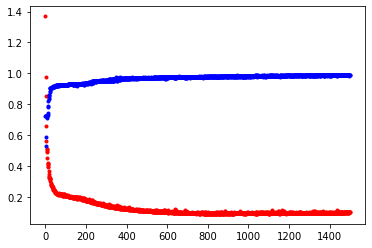

In [54]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
print(len(y_vloss))
x_len = np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, 'o', c = 'red', markersize = 3)
plt.plot(x_len, y_acc, 'o', c = 'blue', markersize = 3)
plt.show()

In [72]:
## 모델로 predict 해보기 ##
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import os 
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('wine.csv',header=None)
X = df.values[:,0:12]
Y = df.values[:,12]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3, random_state=42)

prediction = model.predict(X_test)
print(prediction)

[[2.7621798e-05]
 [3.0922082e-01]
 [2.8622150e-04]
 ...
 [1.2621284e-04]
 [9.0637803e-04]
 [9.4076488e-05]]
